# JK302 Visual Impact on Phoneme Perception in Noise with Natural Sentences

We are going to look at the pilot data and try to attack a few key questions with this notebook.

1. How much does lip reading improve phonemic perception of clear vs noisy speech?

2. Does this interaction change over the course of a sentence?

3. Do some phonemes benefit from speechreading more than others?

### Loading...

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

df = pd.DataFrame.from_csv('C:\\Experiments\\JK302\\dataOut\\bigP.csv')

#Relabel babble condition for clarity
df.loc[df['VideoCond'] == 'AV',('VideoCond')] = 'Audiovisual'
df.loc[df['VideoCond'] == 'AO',('VideoCond')] = 'Auditory Only'

#Make WordIdx start from 1, not zero
df.WordIdx = df.WordIdx+1


Lessons learned from Jk301 Initial Notes

In [96]:
# Fix phoneme alignment issue (correct word given but phonemes assigned to wrong word)
# Find where words match
matchIdx = df['SourceWord'] == df['TargetWord']
#Set the source phonemes to match the target
df.loc[matchIdx,('SourcePhoneme')] = df.loc[matchIdx,('TargetPhoneme')] 
#Reset the measure of phoneme accuracy
df.loc[:,'PhonemeHitBool'] = df['SourcePhoneme'] == df['TargetPhoneme']
#Set a measure all phonemes matching
df.loc[:,('AllPhonsMatch')] = df.groupby('WordCount')['PhonemeHitBool'].transform(lambda x: np.mean(x) ==1)
#Set a measure all phonemes missing
df.loc[:,('AllPhonsMiss')] = df.groupby('WordCount')['PhonemeHitBool'].transform(lambda x: np.mean(x) ==0)
# Make a column for the number of words in the sentence
df['NumWordsInSentence'] = df.groupby(['SentenceCount'])['WordIdx'].transform(max)
dfPT = pd.read_excel(os.path.normpath('C:\TCDTIMIT\Tables\Custom\TablesPhoneme.xlsx'),encoding='latin-1')
df = df[df['TargetPhoneme'].isin(dfPT['CMU Phonemes'])]
#df.rename(columns={'0':'pennpos'}, inplace=True)
#df.rename(columns={'0.1':'upos'}, inplace=True)
df.keys()

Index([u'blah2', u'blah3', u'index', u'TotalTrialOrder', u'Talker',
       u'SentenceType', u'SentenceID', u'Gender', u'NumWords', u'AVOrder',
       u'SoundCond', u'VideoCond', u'CounterBalBlock', u'TrialOrder',
       u'BabbleFile', u'Subject', u'SubjectTalkerNum', u'SourceSentence',
       u'TargetSentence', u'dBSNR', u'1LogGram', u'2LogGram', u'3LogGram',
       u'Indx', u'Word', u'UnTrn', u'StTrn', u'NSyll', u'NPhon', u'unsDENS',
       u'unsFDEN', u'unsLDEN', u'unsCDEN', u'strDENS', u'strFDEN', u'strLDEN',
       u'strCDEN', u'unsBPAV', u'unsFBPAV', u'unsLBPAV', u'unsCBPAV',
       u'strBPAV', u'strFBPAV', u'strLBPAV', u'strCBPAV', u'unsTPAV',
       u'unsFTPAV', u'unsLTPAV', u'unsCTPAV', u'strTPAV', u'strFTPAV',
       u'strLTPAV', u'strCTPAV', u'unsPOSPAV', u'unsFPOSPAV', u'unsLPOSPAV',
       u'unsCPOSPAV', u'strPOSPAV', u'strFPOSPAV', u'strLPOSPAV',
       u'strCPOSPAV', u'unsLCPOSPAV', u'unsFLCPOSPAV', u'unsLLCPOSPAV',
       u'unsCLCPOSPAV', u'strLCPOSPAV', u'strFLCPOSPAV',

In [97]:
#Make plots prettier
#Edited from Randel Olson and many at StackOverflow
# These are the "Tableau 20" colors as RGB.    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.) 


plt.rc('text', color = 'black') 
plt.rc('font', family='sans-serif') 
plt.rc('font', serif='Helvetica Neue') 
plt.rc('axes', titlesize = 18, labelsize = 14,labelcolor ='black')  
plt.rc('lines', linewidth=2,markersize = 10)
plt.rc('xtick',labelsize = 10,color ='black')
plt.rc('ytick',labelsize = 10,color ='black')
def hide_spines():
    """Hides the top and rightmost axis spines from view for all active
    figures and their respective axes."""

    # Retrieve a list of all current figures.
    figures = [x for x in plt._pylab_helpers.Gcf.get_all_fig_managers()]
    for figure in figures:
        # Get all Axis instances related to the figure.
        for ax in figure.canvas.figure.get_axes():
            # Disable spines.
            ax.spines['right'].set_color('none')
            ax.spines['top'].set_color('none')
            # Disable ticks.
            ax.xaxis.set_ticks_position('bottom')
            ax.yaxis.set_ticks_position('left')
%matplotlib inline

In [98]:
df

,blah2,blah3,index,TotalTrialOrder,Talker,SentenceType,SentenceID,Gender,NumWords,AVOrder,...,PhonemeHitBool,WordCount,WordIdx,TargetWord,SourceWord,WordACC,SentenceCount,AllPhonsMatch,AllPhonsMiss,NumWordsInSentence
blah1,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,1,s01M,sx,sx14,M,6,0,...,True,0,1,before,before,1,0,True,False,6
1,0,0,0,1,s01M,sx,sx14,M,6,0,...,True,0,1,before,before,1,0,True,False,6
2,0,0,0,1,s01M,sx,sx14,M,6,0,...,True,0,1,before,before,1,0,True,False,6
3,0,0,0,1,s01M,sx,sx14,M,6,0,...,True,0,1,before,before,1,0,True,False,6
4,0,0,0,1,s01M,sx,sx14,M,6,0,...,True,0,1,before,before,1,0,True,False,6
5,0,0,0,1,s01M,sx,sx14,M,6,0,...,True,1,2,thursday's,thursday's,1,0,True,False,6
6,0,0,0,1,s01M,sx,sx14,M,6,0,...,True,1,2,thursday's,thursday's,1,0,True,False,6
7,0,0,0,1,s01M,sx,sx14,M,6,0,...,True,1,2,thursday's,thursday's,1,0,True,False,6
8,0,0,0,1,s01M,sx,sx14,M,6,0,...,True,1,2,thursday's,thursday's,1,0,True,False,6


### How much does lip reading improve phonemic perception of clear vs noisy speech?

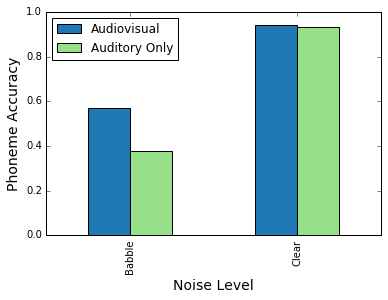

In [99]:
videoByBabble = df[['VideoCond','SoundCond','PhonemeHitBool']].groupby(['SoundCond','VideoCond']).mean().unstack()
videoByBabble
#ax = videoByBabble.plot(kind = 'bar',color = tableau20[0:1])
ax = videoByBabble.plot(kind ='bar',figsize = (6,4), color = [tableau20[x] for x in [0,5]])
ax.set_ylabel('Phoneme Accuracy')
ax.set_xlabel('Noise Level')
ax.legend(loc='best',labels = ['Audiovisual','Auditory Only'])

Do we replicate Sumby and Pollack (1954)?  That is to say, do we find that the ratio of AV improvement over AO is roughly constant?  Calculated as (AOerrors-AVerrors)/AOerrors

In [100]:
videoByBabbleInvert = 1-videoByBabble.loc[:,:]
av = videoByBabbleInvert.xs('Audiovisual',level = 1,axis=1)
ao = videoByBabbleInvert.xs('Auditory Only',level = 1,axis=1)
sumbyRatio = ((ao-av)/ao)
videoByBabbleInvert['PhonemeHitBool','SumbyRatio'] = sumbyRatio
videoByBabbleInvert


PhonemeHitBool                         
VideoCond    Audiovisual Auditory Only SumbyRatio
SoundCond                                        
Babble          0.427796      0.622758   0.313062
Clear           0.058777      0.068952   0.147560

Looks like in our case the amount phonemic improvement under noisy conditions is not only numerically higher, it's a much higher ratio of improvement. However, it could be that our listening "ceiling" is less than 100% in practice, due to loss in working memory, spelling errors or accent confusion. 

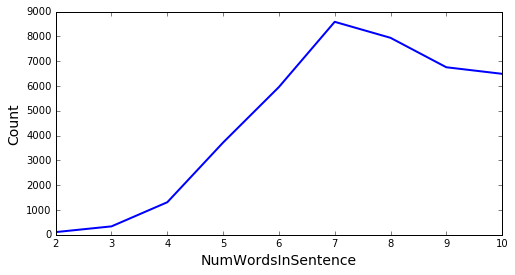

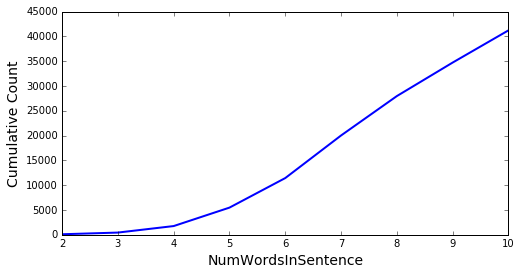

In [101]:
data = df[['NumWordsInSentence','SentenceCount']].groupby('NumWordsInSentence').count()
ax = data.plot(kind = 'line',figsize= (8,4),legend = None)
ax.set_ylabel('Count')

data = df[['NumWordsInSentence','SentenceCount']].groupby('NumWordsInSentence').count().cumsum()
ax = data.plot(kind = 'line',figsize= (8,4),legend = None)
ax.set_ylabel('Cumulative Count')

PhonemeHitBool                         
VideoCond    Audiovisual Auditory Only SumbyRatio
SoundCond                                        
Babble          0.479900      0.646741   0.257972
Clear           0.084529      0.079550  -0.062580

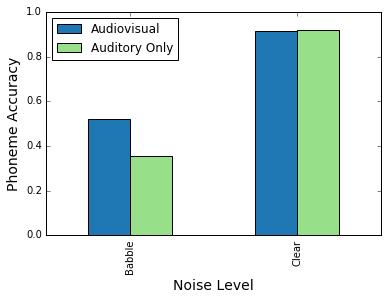

In [102]:
#Long sentence analysis
videoByBabble = df[['VideoCond','SoundCond','PhonemeHitBool']].loc[df['NumWordsInSentence'] >= 8,:].groupby(['SoundCond','VideoCond']).mean().unstack()
videoByBabble
#ax = videoByBabble.plot(kind = 'bar',color = tableau20[0:1])
ax = videoByBabble.plot(kind ='bar',figsize = (6,4), color = [tableau20[x] for x in [0,5]])
ax.set_ylabel('Phoneme Accuracy')
ax.set_xlabel('Noise Level')
ax.legend(loc='best',labels = ['Audiovisual','Auditory Only'])
plt.figure()
videoByBabbleInvert = 1-videoByBabble.loc[:,:]
av = videoByBabbleInvert.xs('Audiovisual',level = 1,axis=1)
ao = videoByBabbleInvert.xs('Auditory Only',level = 1,axis=1)
sumbyRatio = ((ao-av)/ao)
videoByBabbleInvert['PhonemeHitBool','SumbyRatio'] = sumbyRatio
videoByBabbleInvert

### Does the contribution of visual information to phonemic perception change over the course of a sentence?

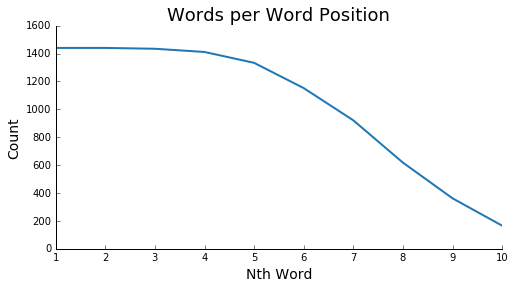

In [103]:
#Instances by word position in sentence
data = df[['PhonemeHitBool','WordIdx','WordCount']].groupby('WordCount').mean().groupby('WordIdx').count()
ax = data.plot(kind='line',figsize=(8,4),color = tableau20[0],legend = None )
ax.set_title('Words per Word Position')
ax.set_xlabel('Nth Word')
ax.set_ylabel('Count')
hide_spines()


At higher word positions, we have fewer instances to draw from. We'll limit or view to word positions 8 or fewer to have enough instances per condition to draw conclusions.

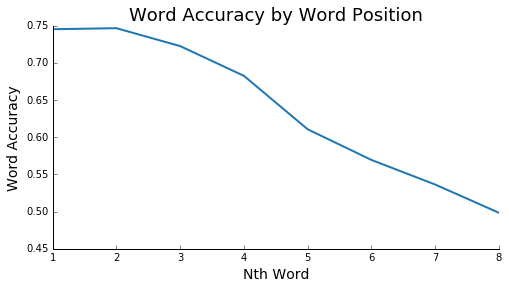

In [104]:
#Instances by word position in sentence
data = df[['WordACC','WordIdx','WordCount']].groupby('WordCount').mean().groupby('WordIdx').mean()[0:8]
ax = data.plot(kind='line',figsize=(8,4),color = tableau20[0],legend = None )
ax.set_title('Word Accuracy by Word Position')
ax.set_xlabel('Nth Word')
ax.set_ylabel('Word Accuracy')
hide_spines()

We have a lovely linearish negative relationship between phoneme accuracy and word position. Wow! >20% drop between the first and 8th word. Same result for phoneme accuracy?

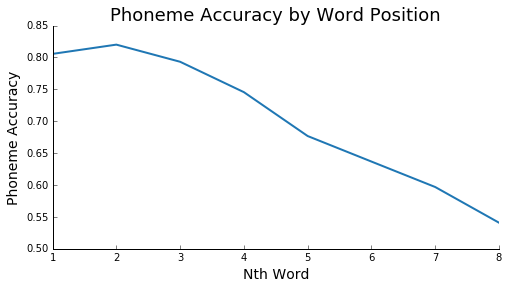

In [105]:
#Instances by word position in sentence
data = df[['PhonemeHitBool','WordIdx','WordCount']].groupby('WordCount').mean().groupby('WordIdx').mean()[0:8]
ax = data.plot(kind='line',figsize=(8,4),color = tableau20[0],legend = None )
ax.set_title('Phoneme Accuracy by Word Position')
ax.set_xlabel('Nth Word')
ax.set_ylabel('Phoneme Accuracy')
hide_spines()

Yup! Phoneme accuracy will be a bit higher overall to account for partially correct responses. Trend is the same though. Lets make this more interesting by splitting it up by condition.

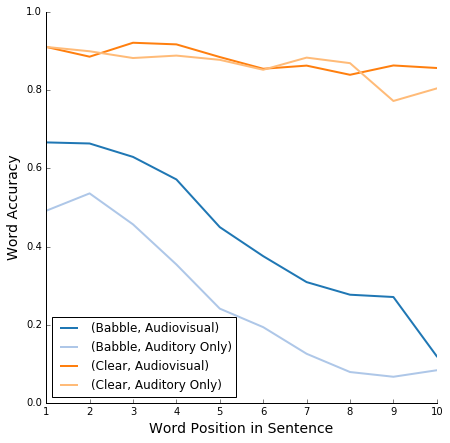

In [245]:
data = df[['WordACC','WordIdx','WordCount','VideoCond','SoundCond']].groupby(['VideoCond','SoundCond','WordCount']).mean()
data = data.reset_index().groupby(['WordIdx','VideoCond','SoundCond']).mean().unstack().unstack()['WordACC'][0:12]
ax = data.plot(kind ='line',figsize=(7,7),color = [tableau20[x] for x in [0,1,2,3]])
ax.legend(loc='best')
ax.set_ylabel('Word Accuracy')
ax.set_xlabel('Word Position in Sentence')
hide_spines()

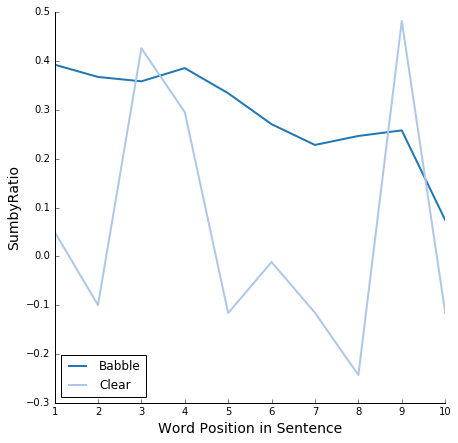

In [107]:
av = 1-data.xs('Audiovisual',level = 1,axis=1)
ao = 1-data.xs('Auditory Only',level = 1,axis=1)
sumbyRatio = (ao-av)/ao
ax = sumbyRatio.plot(kind ='line',figsize=(7,7),color = [tableau20[x] for x in [0,1]])
ax.legend(loc='best')
ax.set_ylabel('SumbyRatio')
ax.set_xlabel('Word Position in Sentence')
hide_spines()


### Do some phonemes benefit from speechreading more than others?

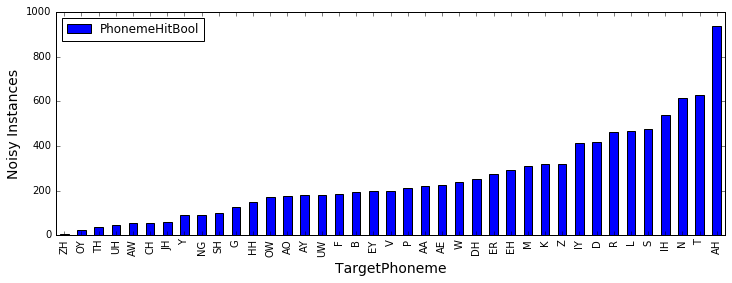

In [108]:
data = df.loc[df['SoundCond'] =='Babble',:]
#a= data['AllPhonsMatch'] == False 
#b = data['AllPhonsMiss'] == False
#boolIdx =a&b 
#data = data.loc[boolIdx,:]
data = data[['TargetPhoneme','PhonemeHitBool','VideoCond']].groupby(['TargetPhoneme']).sum()
instances = data
data = data.sort_values('PhonemeHitBool')
ax = data.plot(kind = 'bar',figsize=(12,4))
ax.legend(loc='best')
ax.set_ylabel('Noisy Instances')


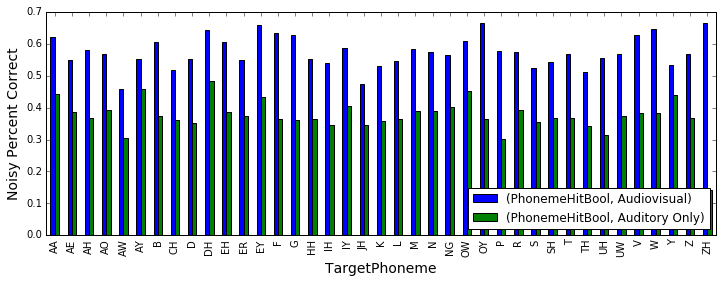

In [109]:
data = df.loc[df['SoundCond'] =='Babble',:]

#Only look at partially correct words
#a= data['AllPhonsMatch'] == False 
#b = data['AllPhonsMiss'] == False
#boolIdx =a&b 
#data = data.loc[boolIdx,:]

data = data[['TargetPhoneme','PhonemeHitBool','VideoCond']].groupby(['TargetPhoneme','VideoCond']).mean()
data = data.unstack()
ax = data.plot(kind = 'bar',figsize=(12,4))
ax.legend(loc='lower right')
ax.set_ylabel('Noisy Percent Correct')
avNoisyPHit = data['PhonemeHitBool','Audiovisual']
aoNoisyPHit = data['PhonemeHitBool','Auditory Only']

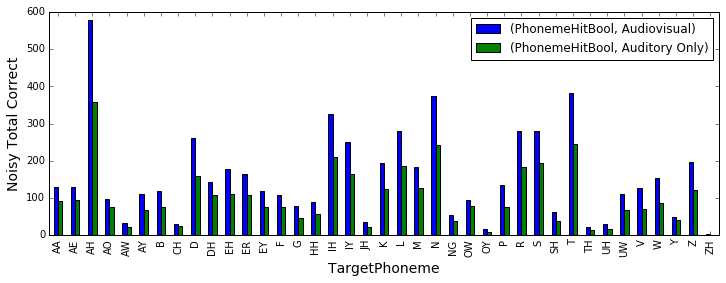

In [110]:
data = df.loc[df['SoundCond'] =='Babble',:]

#Only look at partially correct words
#a= data['AllPhonsMatch'] == False 
#b = data['AllPhonsMiss'] == False
#boolIdx =a&b 
#data = data.loc[boolIdx,:]

data = data[['TargetPhoneme','PhonemeHitBool','VideoCond']].groupby(['TargetPhoneme','VideoCond']).sum()
data = data.unstack()
ax = data.plot(kind = 'bar',figsize=(12,4))
ax.legend(loc='best')
ax.set_ylabel('Noisy Total Correct')
avNoisyPHitSum = data['PhonemeHitBool','Audiovisual']
aoNoisyPHitSum = data['PhonemeHitBool','Auditory Only']


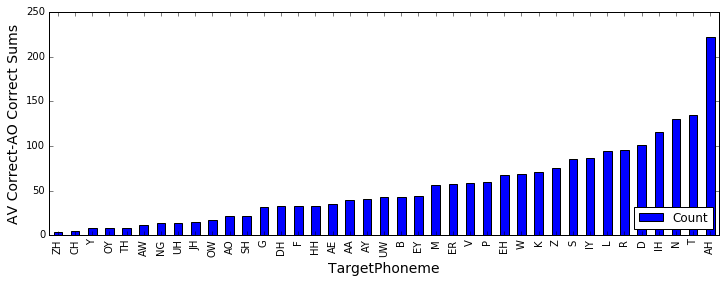

In [111]:
avGain = avNoisyPHitSum-aoNoisyPHitSum
avGainRank = avGain.rank(ascending = False)
avGain.name = 'Count'
data = avGain.sort_values()
ax = data.plot(kind = 'bar',figsize=(12,4))
ax.legend(loc='lower right')
ax.set_ylabel('AV Correct-AO Correct Sums')

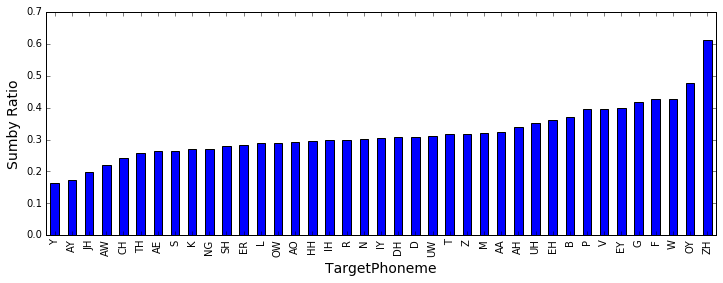

In [112]:
data = df.loc[df['SoundCond'] =='Babble',:]

#Only look at partially correct words
#a= data['AllPhonsMatch'] == False 
#b = data['AllPhonsMiss'] == False
#boolIdx =a&b 
#data = data.loc[boolIdx,:]

data = data[['TargetPhoneme','PhonemeHitBool','VideoCond']].groupby(['TargetPhoneme','VideoCond']).mean()
data = data.unstack()
av = 1-data.xs('Audiovisual',level = 1,axis=1)
ao = 1-data.xs('Auditory Only',level = 1,axis=1)
sumbyRatio = (ao-av)/ao
data = data.join(sumbyRatio)
#instances.name = 'Count'
#data = data.join(instances)
data.columns = ['AV','AO','SumbyRatio']
data = data.sort_values('SumbyRatio')
ax =data['SumbyRatio'].plot(kind ='bar',figsize=(12,4),legend = None)
ax.set_ylabel('Sumby Ratio')

Yay! AV weights for all noisy phonemes!

In [113]:
import os
dfPT = pd.read_excel(os.path.normpath('C:\TCDTIMIT\Tables\Custom\TablesPhoneme.xlsx'),encoding='latin-1')
sumbyRank = sumbyRatio.rank()
aoNoisyRank = aoNoisyPHit.rank()
avNoisyRank = avNoisyPHit.rank()
rankDif = avNoisyRank-aoNoisyRank
rankDifNorm = (rankDif-min(rankDif))/max(rankDif-min(rankDif))
rankDifNorm

TargetPhoneme
AA    0.351145
AE    0.183206
AH    0.519084
AO    0.290076
AW    0.396947
AY    0.076336
B     0.519084
CH    0.305344
D     0.503817
DH    0.366412
EH    0.458015
ER    0.274809
EY    0.473282
F     0.702290
G     0.763359
HH    0.442748
IH    0.442748
IY    0.335878
JH    0.366412
K     0.366412
L     0.351145
M     0.381679
N     0.335878
NG    0.198473
OW    0.320611
OY    0.801527
P     0.763359
R     0.305344
S     0.366412
SH    0.259542
T     0.442748
TH    0.396947
UH    0.610687
UW    0.412214
V     0.549618
W     0.595420
Y     0.000000
Z     0.442748
ZH    1.000000
dtype: float64

Let's visualize the advantage of having visual information at the phonetic level a better way, with the help of an interactive phonetic chart! Lots of code below so be patient!

In [240]:

global cmaps
def BokehTable(cmaps):
    from bokeh.models import HoverTool, ColumnDataSource,CustomJS
    from bokeh.plotting import figure, show, output_file
    import pandas as pd
    import os
    import math
    from bokeh.io import output_notebook,vform,push_notebook
    global source
    

    cmap = cmaps[0]        
    output_notebook()
    #dfPT = pd.DataFrame.from_csv(os.path.normpath('C:\TCDTIMIT\Tables\Custom\TablesPhoneme.csv'))
    dfPT = pd.read_excel(os.path.normpath('C:\TCDTIMIT\Tables\Custom\TablesPhoneme.xlsx'),encoding='latin-1')
    #cmap = [aoNoisyRank.loc[aoNoisyRank.index == cmu].values[0] for cmu in dfPT['CMU Phonemes'][0:39]]/max(aoNoisyRank.values)
    #cmap = [rankDifNorm.loc[rankDifNorm.index == cmu].values[0] for cmu in dfPT['CMU Phonemes'][0:39]]/max(rankDifNorm.values)
        
    source = ColumnDataSource(
        data=dict(
            xaxis=[str(x) for x in dfPT['AdrianXCoord']],
            yaxis=[str(y) for y in dfPT['AdrianYCoord']],
            cmu=[str(s) for s in dfPT['CMU Phonemes']],
            type=[str(x) for x in cmap],
            sym=[x for x in dfPT['IPA symbol']],
            jrank=[x for x in dfPT['Jeffers Visibility Rank']],
            mpcrank=[x for x in dfPT['MPC Rank']], 
            gvrank=[x for x in dfPT['Gillen Based Visual Weight'].rank(ascending=False)],
            gaorank=[x for x in dfPT['Gillen Audio Only Clear Hit Rate'].rank(ascending=False)],
            example=[x for x in dfPT['CMU Examples']],   
            type_color = ['#%02x%02x%02x' % (0,0,0) if math.isnan(x) else '#%02x%02x%02x' % (x*255,255-(x*255),0) for x in cmap] #Must be hexadecima
        )
    )

    p = figure(tools="resize,hover,save")
    p.plot_width = 1200
    p.toolbar_location = None
    p.outline_line_color = None

    p.rect("xaxis", "yaxis", 0.9, 0.9, source=source,
           fill_alpha=0.6, color="type_color")

    #p.rect("xaxis", "yaxis", 0.9, 0.9, source=source,
    #       fill_alpha=0.6)

    text_props = {
        "source": source,
        "angle": 0,
        "color": "black",
        "text_align": "left",
        "text_baseline": "middle"
    }

    p.text(x="xaxis", y="yaxis", text="sym",
           text_font_style="bold", text_font_size="15pt", **text_props)



    p.grid.grid_line_color = None

    p.select_one(HoverTool).tooltips = [
        ("cmu", "@cmu"),
        ("example", "@example"),
        ("jrank","@jrank"),
        ("mpcrank","@mpcrank"),
        ("gaorank","@gaorank"),
        ("gvrank","@gvrank"),

    ]
    show(p) 
    
def update(f):
    import math
    from bokeh.io import push_notebook
    cmap = cmaps[titles.index(f)] 
    type_color = ['#%02x%02x%02x' % (0,0,0) if math.isnan(x) else '#%02x%02x%02x' % (x*255,255-(x*255),0) for x in cmap]
    source.data['type_color'] = type_color
    push_notebook() 

In [241]:
data = df.loc[df['SoundCond'] =='Babble',:]
#Only look at partially correct words
#a= data['AllPhonsMatch'] == False 
#b = data['AllPhonsMiss'] == False
#boolIdx =a&b 
#data = data.loc[boolIdx,:]

data = data[['TargetPhoneme','PhonemeHitBool','VideoCond']].groupby(['TargetPhoneme','VideoCond']).mean()
data = data.unstack()
ao = data.xs('Auditory Only',level = 1,axis=1)
av = data.xs('Audiovisual',level = 1,axis=1)

#Lousy Hack!!!!!!!!!!
ao.loc[('ZH'),('PhonemeHitBool')] = 0
av.loc[('ZH'),('PhonemeHitBool')] = 0

aoRank = ao.rank(ascending = False)
avRank = av.rank(ascending = False)



sumbyRatio = ((1-ao)-(1-av))/(1-ao)
sumbyRank = sumbyRatio.rank(ascending = False)
dfPT = pd.read_excel(os.path.normpath('C:\TCDTIMIT\Tables\Custom\TablesPhoneme.xlsx'),encoding='latin-1')

cmaps =[]
titles =[]

Jeffers = dfPT['Jeffers Visibility Rank']
titles.append('Jeffers Visibility Map')
cmaps.append(Jeffers/max(Jeffers))

MPC = dfPT['MPC Rank']
titles.append('Movement-to-Phonetic Correspondance Map')
cmaps.append(MPC/max(MPC))

titles.append('Sumby Noisy Visibility Map')
cmaps.append([sumbyRank.loc[sumbyRank.index == cmu].values[0][0] for cmu in dfPT['CMU Phonemes'][0:39]]/max(sumbyRank.values))

titles.append('Auditory Only Noisy Rank Map')
cmaps.append([aoRank.loc[aoRank.index == cmu].values[0][0] for cmu in dfPT['CMU Phonemes'][0:39]]/max(aoRank.values)) 

titles.append('Audiovisual Noisy Rank Map')
cmaps.append([avRank.loc[avRank.index == cmu].values[0][0] for cmu in dfPT['CMU Phonemes'][0:39]]/max(avRank.values)) 

titles.append('AV Gain Raw Rank')
cmaps.append([avGainRank[avGainRank.index == cmu].values for cmu in dfPT['CMU Phonemes'][0:39]]/max(avGainRank.values)) 

#pd.concat([Jeffers,dfPT['CMU Phonemes'][0:39]],axis=1).set_index('CMU Phonemes')

C:\Anaconda2_32bit\lib\site-packages\ipykernel\__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda2_32bit\lib\site-packages\ipykernel\__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [242]:
sumbyRank

,PhonemeHitBool
TargetPhoneme,
AA,12
AE,32
AH,11
AO,24
AW,35
AY,37
B,8
CH,34
D,17


Here it is! Use the drop down menu below to select the coloring scheme for the phonetic chart.

In [243]:
from IPython.html.widgets import interact
interact(update,f=titles)

In [244]:
BokehTable(cmaps)    

Loading BokehJS ...

In [119]:
#For future reference
#callback = CustomJS(args=dict(source=source), code="""
#        var data = source.get('data');
#        var f = cb_obj.get('value')
#        x = data['x']
#        y = data['y']
#        for (i = 0; i < x.length; i++) {
#            y[i] = Math.pow(x[i], f)
#        }
#        source.trigger('change');
#    """)


We can also look at the map for the clear data

In [237]:
data = df.loc[df['SoundCond'] =='Clear',:]


data = data[['TargetPhoneme','PhonemeHitBool','VideoCond']].groupby(['TargetPhoneme','VideoCond']).mean()
data = data.unstack()
av = 1-data.xs('Audiovisual',level = 1,axis=1)
ao = 1-data.xs('Auditory Only',level = 1,axis=1)
sumbyRatio = (ao-av)/ao
sumbyRank = sumbyRatio.rank(ascending = False)
cmaps = []
titles = []
cmaps.append([sumbyRank.loc[sumbyRank.index == cmu].values[0][0] for cmu in dfPT['CMU Phonemes'][0:39]]/max(sumbyRank.values))
titles.append('Sumby Clear Visibility Map')
BokehTable(cmaps)

Loading BokehJS ...

### Did participants have similar performance?

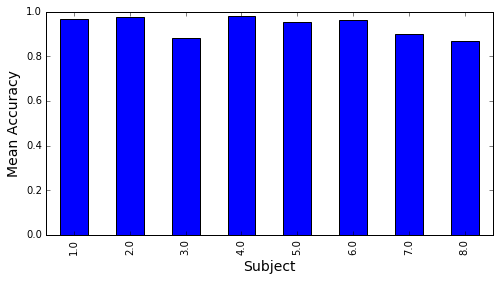

In [121]:
#Average acc
ax = df[['PhonemeHitBool','Talker','Subject']][df['SoundCond'] == 'Clear'].groupby('Subject').mean().plot(kind = 'bar',figsize=(8,4),legend = None)
ax.set_ylabel('Mean Accuracy')

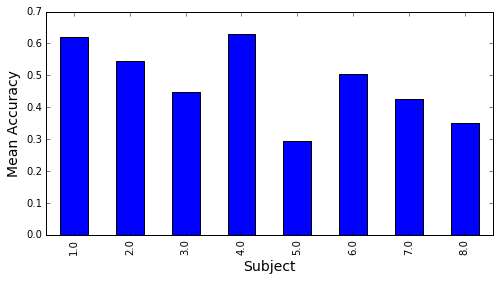

In [122]:
#Average acc
ax = df[['PhonemeHitBool','Talker','Subject']][df['SoundCond'] == 'Babble'].groupby('Subject').mean().plot(kind = 'bar',figsize=(8,4),legend = None)
ax.set_ylabel('Mean Accuracy')

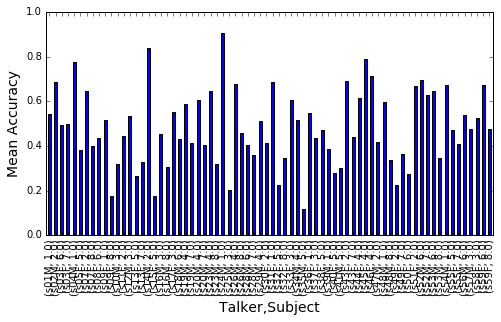

In [123]:
#Average acc
ax = df[['PhonemeHitBool','Talker','Subject']][df['SoundCond'] == 'Babble'].groupby(['Talker','Subject']).mean().plot(kind = 'bar',figsize=(8,4),legend = None)
ax.set_ylabel('Mean Accuracy')

### Did participants improve over the course of of each block as they got used to the speaker?

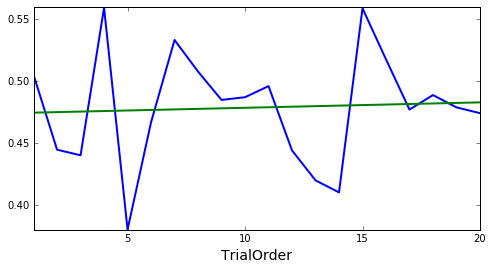

In [124]:
data = df[['PhonemeHitBool','TrialOrder']][df['SoundCond'] == 'Babble'].groupby('TrialOrder').mean()
data.plot(kind = 'line',figsize=(8,4),legend = None)
ax.set_ylabel('Mean Accuracy')

#From Dan Allen
import statsmodels.api as sm
def fit_line2(x, y):
    """Return slope, intercept of best fit line."""
    X = sm.add_constant(x)
    model = sm.OLS(y, X, missing='drop') # ignores entires where x or y is NaN
    fit = model.fit()
    return fit.params[1], fit.params[0] # could also return stderr in each via fit.bse
x = data.index
y = data.values
m, b = fit_line2(x,y)
N = 100 # could be just 2 if you are only drawing a straight line...
points = np.linspace(x.min(), x.max(), N)
plt.plot(points, m*points + b)


### Do different parts of speech have different AV profiles?

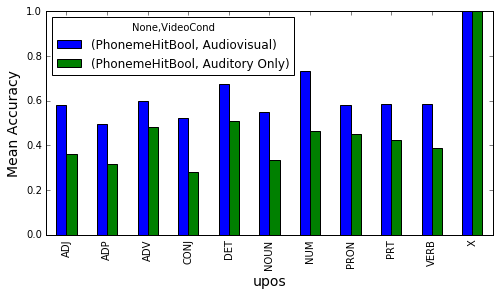

In [125]:
#Average acc
ax = df[['PhonemeHitBool','VideoCond','upos']][df['SoundCond'] == 'Babble'].groupby(['upos','VideoCond']).mean().unstack().plot(kind = 'bar',figsize=(8,4))
ax.set_ylabel('Mean Accuracy')

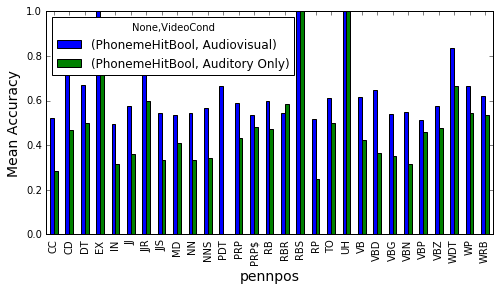

In [126]:
#Average acc
ax = df[['PhonemeHitBool','VideoCond','pennpos']][df['SoundCond'] == 'Babble'].groupby(['pennpos','VideoCond']).mean().unstack().plot(kind = 'bar',figsize=(8,4))
ax.set_ylabel('Mean Accuracy')

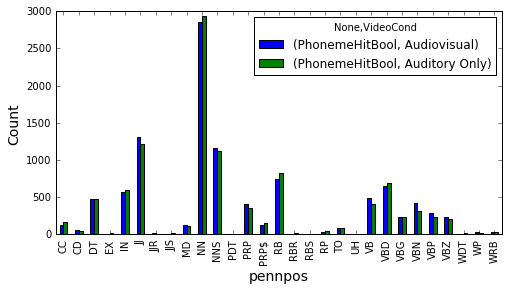

In [127]:
#Counts
ax = df[['PhonemeHitBool','VideoCond','pennpos']][df['SoundCond'] == 'Babble'].groupby(['pennpos','VideoCond']).count().unstack().plot(kind = 'bar',figsize=(8,4))
ax.set_ylabel('Count')

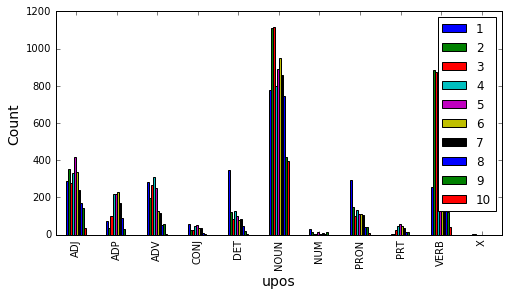

In [128]:
#COunts
ax = df[['WordIdx','upos']][df['SoundCond'] == 'Babble'].groupby(['upos','WordIdx']).size().unstack().plot(kind = 'bar',figsize=(8,4))
ax.set_ylabel('Count')
ax.legend(loc= 'best')

PhonemeHitBool                         
VideoCond    Audiovisual Auditory Only SumbyRatio
pennpos                                          
DT              0.332636      0.500000   0.334728
IN              0.503484      0.682968   0.262800
JJ              0.424219      0.638821   0.335934
NN              0.454227      0.667007   0.319008
NNS             0.435609      0.658059   0.338039
PRP             0.411192      0.567867   0.275901
RB              0.402159      0.528624   0.239233
VB              0.386364      0.577017   0.330412
VBD             0.353941      0.636494   0.443921
VBN             0.449761      0.686084   0.344452

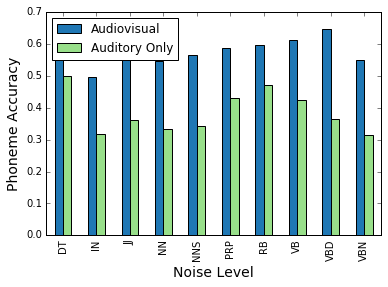

In [232]:
#Long sentence analysis
videoByBabble = df[['pennpos','VideoCond','PhonemeHitBool']].loc[df['SoundCond'] == 'Babble',:].groupby(['pennpos','VideoCond']).mean().unstack()
videoByBabbleCount = df[['pennpos','VideoCond','PhonemeHitBool']].loc[df['SoundCond'] == 'Babble',:].groupby(['pennpos','VideoCond']).size().unstack()
#Restrict to words with more than 300 instances in each group
booldf =(videoByBabbleCount > 300)
videoByBabble = videoByBabble[(booldf['Audiovisual'] == True) & (booldf['Auditory Only'] == True)]
videoByBabble
#ax = videoByBabble.plot(kind = 'bar',color = tableau20[0:1])
ax = videoByBabble.plot(kind ='bar',figsize = (6,4), color = [tableau20[x] for x in [0,5]])
ax.set_ylabel('Phoneme Accuracy')
ax.set_xlabel('Noise Level')
ax.legend(loc='best',labels = ['Audiovisual','Auditory Only'])
plt.figure()
videoByBabbleInvert = 1-videoByBabble.loc[:,:]

av = videoByBabbleInvert.xs('Audiovisual',level = 1,axis=1)
ao = videoByBabbleInvert.xs('Auditory Only',level = 1,axis=1)
sumbyRatio = ((ao-av)/ao)
videoByBabbleInvert['PhonemeHitBool','SumbyRatio'] = sumbyRatio
videoByBabbleInvert

PhonemeHitBool                         
VideoCond    Audiovisual Auditory Only SumbyRatio
upos                                             
ADJ             0.420582      0.637380   0.340140
ADP             0.503484      0.682968   0.262800
ADV             0.400000      0.516347   0.225328
DET             0.322772      0.491296   0.343019
NOUN            0.448852      0.664530   0.324557
PRON            0.418440      0.548872   0.237637
VERB            0.415017      0.610579   0.320290

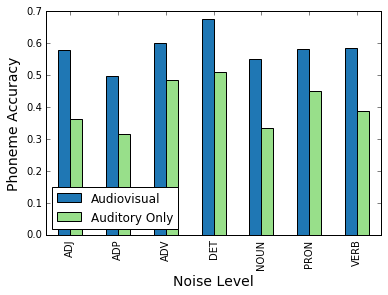

In [230]:
data=df
videoByBabble = data[['upos','VideoCond','PhonemeHitBool']].loc[data['SoundCond'] == 'Babble',:].groupby(['upos','VideoCond']).mean().unstack()
videoByBabbleCount = data[['upos','VideoCond','PhonemeHitBool']].loc[data['SoundCond'] == 'Babble',:].groupby(['upos','VideoCond']).size().unstack()
#Restrict to words with more than 200 instances in each group
booldf =(videoByBabbleCount > 200)
videoByBabble = videoByBabble[(booldf['Audiovisual'] == True) & (booldf['Auditory Only'] == True)]
videoByBabble
#ax = videoByBabble.plot(kind = 'bar',color = tableau20[0:1])
ax = videoByBabble.plot(kind ='bar',figsize = (6,4), color = [tableau20[x] for x in [0,5]])
ax.set_ylabel('Phoneme Accuracy')
ax.set_xlabel('Noise Level')
ax.legend(loc='lower left',labels = ['Audiovisual','Auditory Only'])
plt.figure()
videoByBabbleInvert = 1-videoByBabble.loc[:,:]

av = videoByBabbleInvert.xs('Audiovisual',level = 1,axis=1)
ao = videoByBabbleInvert.xs('Auditory Only',level = 1,axis=1)
sumbyRatio = ((ao-av)/ao)
videoByBabbleInvert['PhonemeHitBool','SumbyRatio'] = sumbyRatio
videoByBabbleInvert

PhonemeHitBool                         
VideoCond    Audiovisual Auditory Only SumbyRatio
upos                                             
ADJ             0.185393      0.522523   0.645196
ADV             0.208000      0.392405   0.469935
DET             0.171779      0.306452   0.439458
NOUN            0.300771      0.479381   0.372585
PRON            0.291391      0.373239   0.219293
VERB            0.333333      0.507692   0.343434

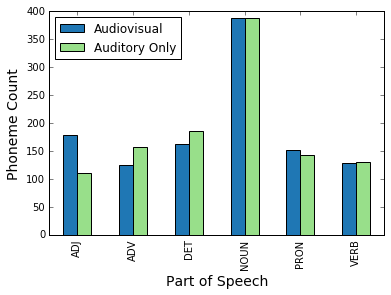

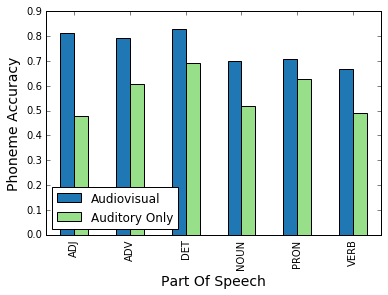

In [236]:
#Restrict to a particular word position
data = df.loc[df['WordIdx'] == 1,:]
#data=df
videoByBabble = data[['upos','VideoCond','PhonemeHitBool']].loc[data['SoundCond'] == 'Babble',:].groupby(['upos','VideoCond']).mean().unstack()
videoByBabbleCount = data[['upos','VideoCond','PhonemeHitBool']].loc[data['SoundCond'] == 'Babble',:].groupby(['upos','VideoCond']).size().unstack()
#Restrict to words with more than 100 instances in each group
booldf =(videoByBabbleCount > 100)
videoByBabble = videoByBabble[(booldf['Audiovisual'] == True) & (booldf['Auditory Only'] == True)]
videoByBabbleCount = videoByBabbleCount[(booldf['Audiovisual'] == True) & (booldf['Auditory Only'] == True)]
#ax = videoByBabble.plot(kind = 'bar',color = tableau20[0:1])
ax = videoByBabbleCount.plot(kind ='bar',figsize = (6,4), color = [tableau20[x] for x in [0,5]])
ax.set_ylabel('Phoneme Count')
ax.set_xlabel('Part of Speech')
ax.legend(loc='best',labels = ['Audiovisual','Auditory Only'])

plt.figure()

#ax = videoByBabble.plot(kind = 'bar',color = tableau20[0:1])
ax = videoByBabble.plot(kind ='bar',figsize = (6,4), color = [tableau20[x] for x in [0,5]])
ax.set_ylabel('Phoneme Accuracy')
ax.set_xlabel('Part Of Speech')
ax.legend(loc='lower left',labels = ['Audiovisual','Auditory Only'])
plt.figure()
videoByBabbleInvert = 1-videoByBabble.loc[:,:]

av = videoByBabbleInvert.xs('Audiovisual',level = 1,axis=1)
ao = videoByBabbleInvert.xs('Auditory Only',level = 1,axis=1)
sumbyRatio = ((ao-av)/ao)
videoByBabbleInvert['PhonemeHitBool','SumbyRatio'] = sumbyRatio
videoByBabbleInvert



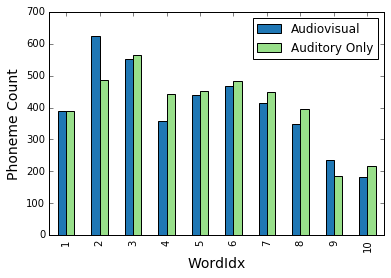

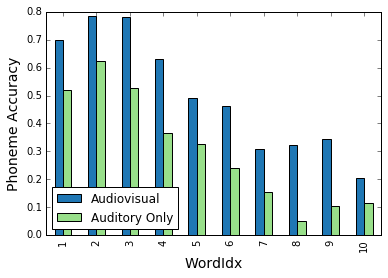

In [247]:
#Restrict to a particular word position
data = df.loc[df['upos'] == 'NOUN',:]
#data=df
videoByBabble = data[['WordIdx','VideoCond','PhonemeHitBool']].loc[data['SoundCond'] == 'Babble',:].groupby(['WordIdx','VideoCond']).mean().unstack()
videoByBabbleCount = data[['WordIdx','VideoCond','PhonemeHitBool']].loc[data['SoundCond'] == 'Babble',:].groupby(['WordIdx','VideoCond']).size().unstack()
#Restrict to words with more than 50 instances in each group
booldf =(videoByBabbleCount > 50)
videoByBabble = videoByBabble[(booldf['Audiovisual'] == True) & (booldf['Auditory Only'] == True)]
videoByBabbleCount = videoByBabbleCount[(booldf['Audiovisual'] == True) & (booldf['Auditory Only'] == True)]
#ax = videoByBabble.plot(kind = 'bar',color = tableau20[0:1])
ax = videoByBabbleCount.plot(kind ='bar',figsize = (6,4), color = [tableau20[x] for x in [0,5]])
ax.set_ylabel('Phoneme Count')
ax.set_xlabel('WordIdx')
ax.legend(loc='best',labels = ['Audiovisual','Auditory Only'])

plt.figure()

#ax = videoByBabble.plot(kind = 'bar',color = tableau20[0:1])
ax = videoByBabble.plot(kind ='bar',figsize = (6,4), color = [tableau20[x] for x in [0,5]])
ax.set_ylabel('Phoneme Accuracy')
ax.set_xlabel('WordIdx')
ax.legend(loc='lower left',labels = ['Audiovisual','Auditory Only'])
plt.figure()
videoByBabbleInvert = 1-videoByBabble.loc[:,:]

av = videoByBabbleInvert.xs('Audiovisual',level = 1,axis=1)
ao = videoByBabbleInvert.xs('Auditory Only',level = 1,axis=1)
sumbyRatio = ((ao-av)/ao)
videoByBabbleInvert['PhonemeHitBool','SumbyRatio'] = sumbyRatio
#videoByBabbleInvert

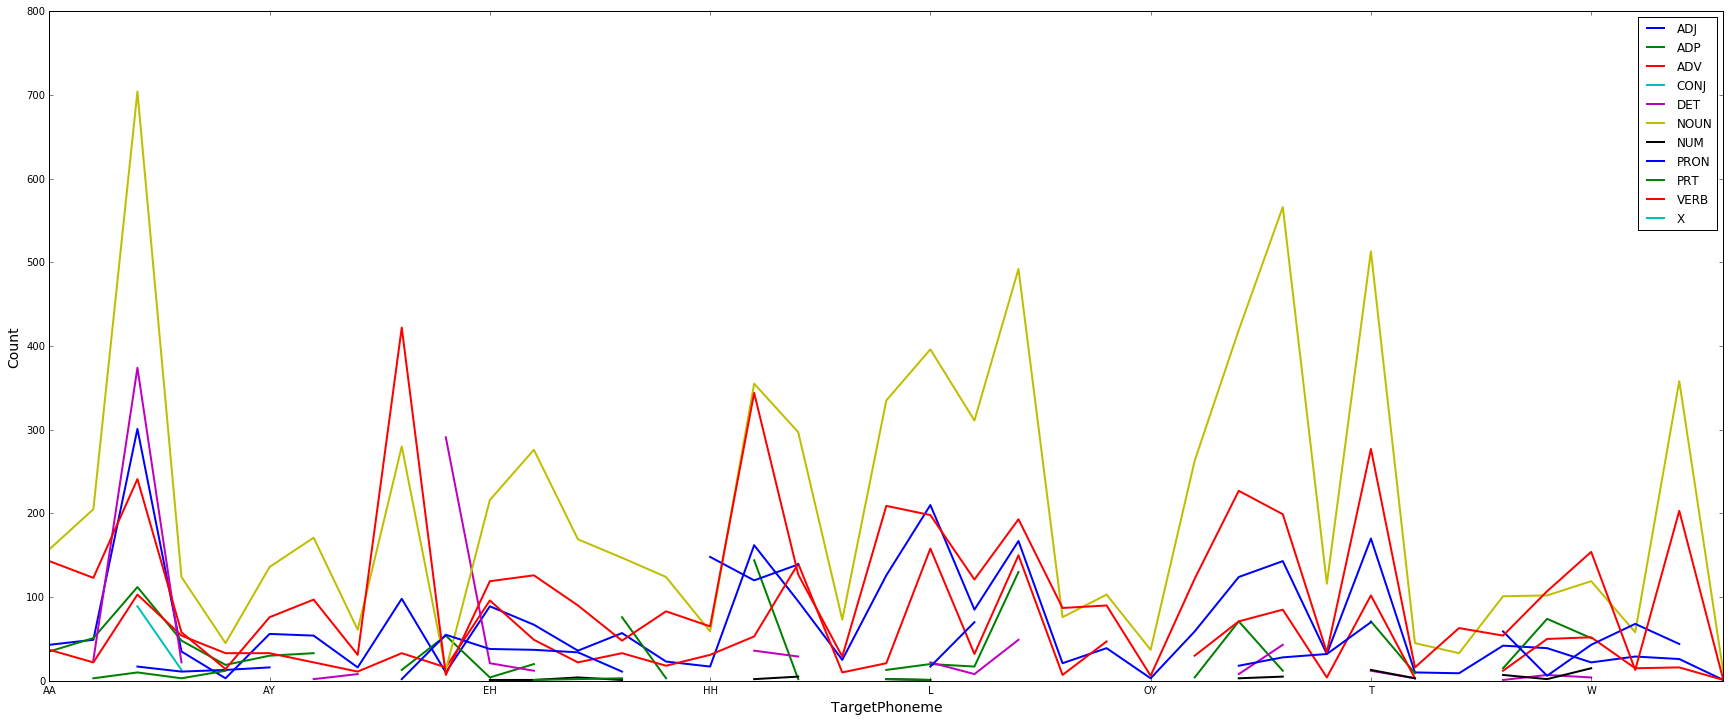

In [131]:
#COunts
ax = df[['TargetPhoneme','upos']][df['SoundCond'] == 'Babble'].groupby(['TargetPhoneme','upos']).size().unstack().plot(kind = 'line',figsize=(30,12))
ax.set_ylabel('Count')
ax.legend(loc= 'best')